## Loading Data - Functions 

In [246]:
from joblib import load
import numpy as np
import pandas as pd

def load_df(filename):
  temp_load = load('Data/'+filename)
  temp_load.index = np.arange(0,len(temp_load))
  temp_load.drop(columns = ['index'], inplace = True)
  if temp_load.isnull().any().any():
    print('Error: null entry')
    return temp_load[temp_load.isnull()]
  return temp_load

In [247]:
dat = load_df('manycomposers_5000')
print(dat['Era'].value_counts(), dat['Composer'].value_counts())

Classical    2948
Romantic     2901
Baroque      1573
Modernist     198
Name: Era, dtype: int64 beethoven       2095
bach            1573
schubert        1369
chopin           869
mozart           853
schumann         329
satie            198
rachmaninoff     183
czerny           151
Name: Composer, dtype: int64


In [248]:
#pick only the counted notes played features
#dat = dat.drop(columns = dat.columns[-8:-1])

# pick composers
composer_picks = ['bach','mozart','chopin']
dat = dat[dat['Composer'].isin(composer_picks)]
dat

#pick composers that have more than 500 samples to work with
# composer_counts = dat['Composer'].value_counts()
# dat = dat[dat['Composer'].isin(composer_counts[composer_counts > 500].index)]

#pick eras
# era_picks = ['Classical','Romantic','Baroque']
# dat = dat[dat['Era'].isin(era_picks)]
dat

,filename,Composer,17,19,21,22,23,24,25,26,...,102,103,range,abs_avg_jump,avg_jump,mean_length,median_length,chord_frequency,chord_spread,Era
0,Data/ChopinKeyboard/Chop-28-8.mid,chopin,0,0,0,0,0,0,0,0,...,0,0,50,7.410405,0.000000,80.274286,64.0,0.400000,15.200000,Romantic
1,Data/ChopinKeyboard/Chop-28-8.mid,chopin,0,0,0,0,0,0,0,0,...,0,0,48,7.232558,-0.046512,79.264368,64.0,0.402299,12.171429,Romantic
2,Data/ChopinKeyboard/Chop-28-8.mid,chopin,0,0,0,0,0,0,0,0,...,0,0,49,7.614035,-0.152047,79.167630,64.0,0.404624,19.971429,Romantic
3,Data/ChopinKeyboard/Chop-28-8.mid,chopin,0,0,0,0,0,0,0,0,...,0,0,51,7.988372,-0.093023,78.528736,64.0,0.390805,18.588235,Romantic
4,Data/ChopinKeyboard/Chop-28-8.mid,chopin,0,0,0,0,0,0,0,0,...,0,0,41,7.818713,0.064327,79.352601,64.0,0.404624,10.911765,Romantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714,Data/MozartKeyboard/NotteEGiorno.mid,mozart,0,0,0,0,0,0,0,0,...,0,0,33,4.247312,0.290323,218.000000,192.0,0.989583,20.818182,Classical
5715,Data/MozartKeyboard/NotteEGiorno.mid,mozart,0,0,0,0,0,0,0,0,...,0,0,40,5.591837,-0.489796,321.230769,384.0,1.000000,25.090909,Classical
5716,Data/MozartKeyboard/NotteEGiorno.mid,mozart,0,0,0,0,0,0,0,0,...,0,0,39,8.176471,-0.235294,306.162162,192.0,0.837838,14.181818,Classical
5717,Data/MozartKeyboard/NotteEGiorno.mid,mozart,0,0,0,0,0,0,0,0,...,0,0,34,6.814815,-0.222222,186.285714,96.0,0.785714,20.285714,Classical


In [249]:
from sklearn.model_selection import train_test_split

#change between Composer and Era
y = dat['Composer']
X = dat.drop(['Composer','filename','Era'], axis=1)

#custom train test split so the same pieces aren't in both test/train sets
X_train, X_test, y_train, y_test = train_test_split(X, y)
#dat.groupby('filename')

In [251]:
X_train

,17,19,21,22,23,24,25,26,27,28,...,101,102,103,range,abs_avg_jump,avg_jump,mean_length,median_length,chord_frequency,chord_spread
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,58,8.125786,0.138365,85.565217,64.0,0.360248,30.413793
5026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,50,5.906977,-0.558140,341.311111,384.0,0.800000,10.153846
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,41,4.481928,-0.216867,195.388235,96.0,0.611765,21.250000
5279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,24,5.166667,-0.071429,349.090909,192.0,0.750000,13.400000
3363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,41,2.777778,-0.111111,120.510638,96.0,0.042553,32.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,10,1.884615,-0.192308,184.888889,192.0,0.000000,0.000000
3761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,45,3.388889,0.011111,158.608696,96.0,0.847826,24.157895
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,39,5.757576,0.181818,225.882353,128.0,0.455882,8.692308
5576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,46,8.000000,-0.186047,290.181818,192.0,0.965909,15.576923


## PCA

In [252]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

X_normal = StandardScaler(with_std=True).fit_transform(X_train)

pca = PCA()
X_pca_train = pca.fit_transform(X_normal)

Text(0.5, 0, 'N Components')

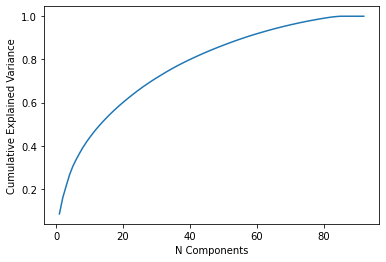

In [253]:
evar = pca.explained_variance_ratio_

sns.lineplot(x = np.arange(1,1+len(evar)), y = evar.cumsum())
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('N Components')

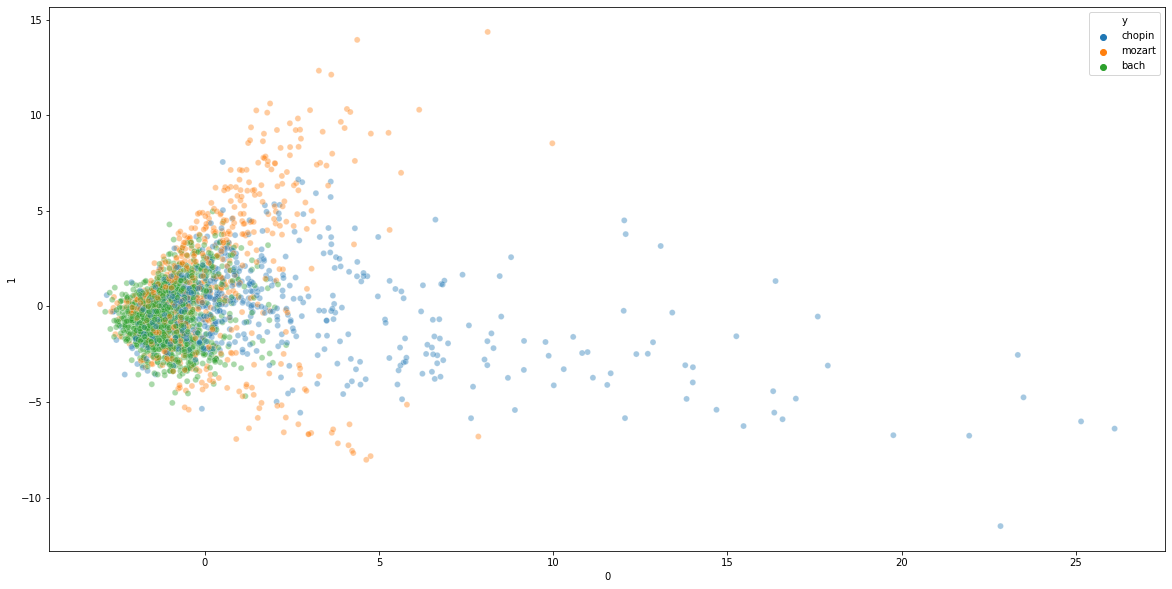

In [254]:
#plot the variables transformed by pca
tf_Xtrain = pd.DataFrame(X_pca_train)
tf_Xtrain['y'] = y_train.values

plt.figure(figsize=(20,10))
_ = sns.scatterplot(x = tf_Xtrain[0], y = tf_Xtrain[1], hue = tf_Xtrain['y'], alpha = 0.4)
# plt.ylim([-10,10])
# plt.xlim([-6,10])

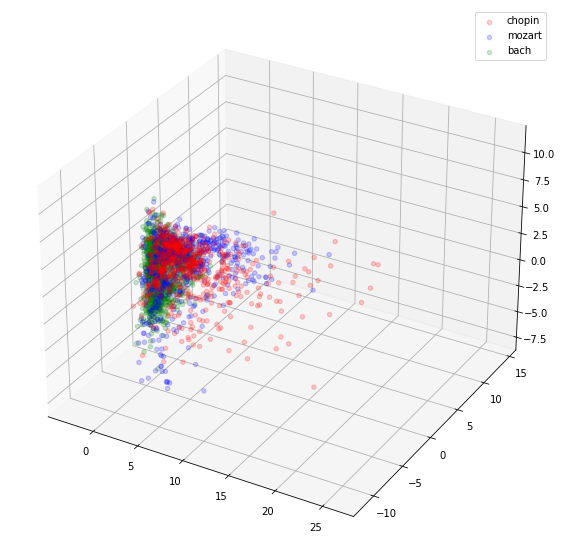

In [255]:
#Plot 3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection = '3d')

x = tf_Xtrain[0]
y = tf_Xtrain[1]
z = tf_Xtrain[2]
color = tf_Xtrain['y']

for u, c in zip(color.unique(), ['red', 'blue', 'green', 'orange', 'purple', 'black']):
  rel_u = color[color == u].index
  ax.scatter3D(x[rel_u], 
               y[rel_u], 
               z[rel_u], 
               color = c,
               label = u, alpha = 0.2)
plt.legend()
plt.show()

## LDA

In [256]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_prob_lda = lda.predict_proba(X_test)

In [257]:
from matplotlib import pyplot as plt
train_lda = lda.transform(X_train) 
test_lda = lda.transform(X_test) 
labels = lda.predict(X_test) 

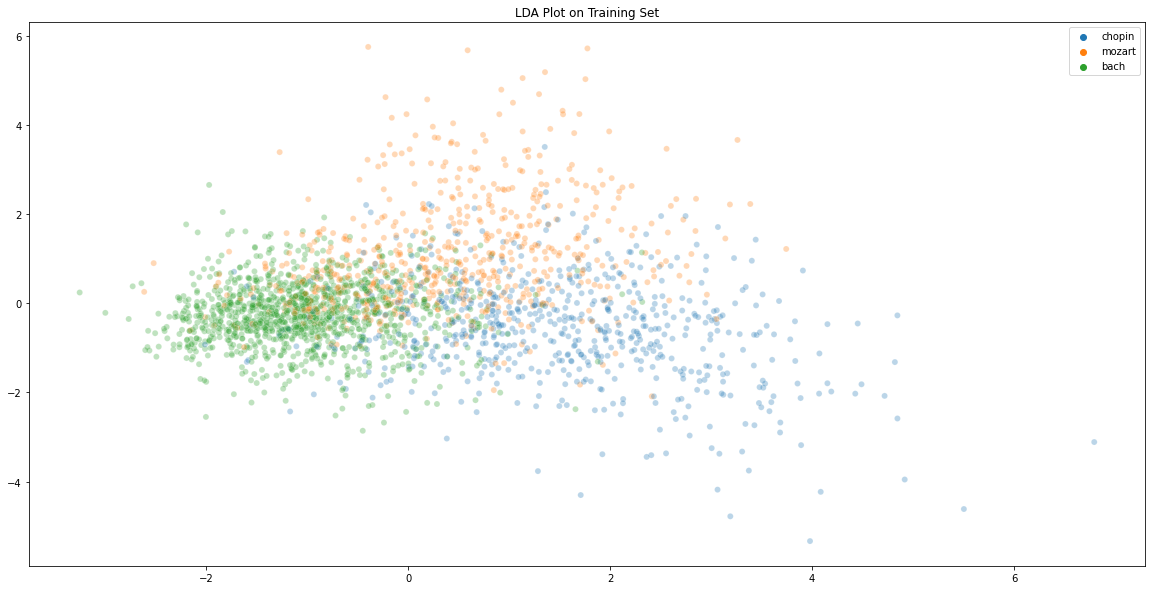

In [258]:
plt.figure(figsize=(20,10))

sns.scatterplot(x = train_lda[:,0], y = train_lda[:,1], alpha = 0.3, hue = y_train)
plt.legend(loc='best')
plt.title('LDA Plot on Training Set')

plt.show()

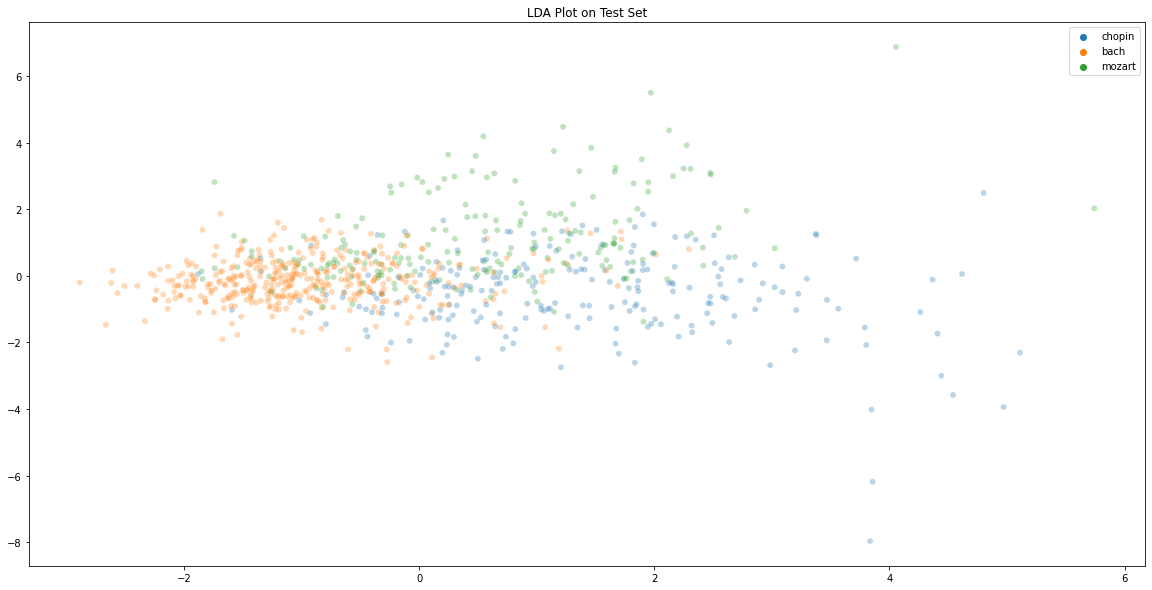

In [259]:
plt.figure(figsize=(20,10))

sns.scatterplot(x = test_lda[:,0], y = test_lda[:,1], alpha = 0.3, hue = y_test)
plt.legend(loc='best')
plt.title('LDA Plot on Test Set')
plt.show()

In [260]:
y_pred_lda = lda.predict(X_test)

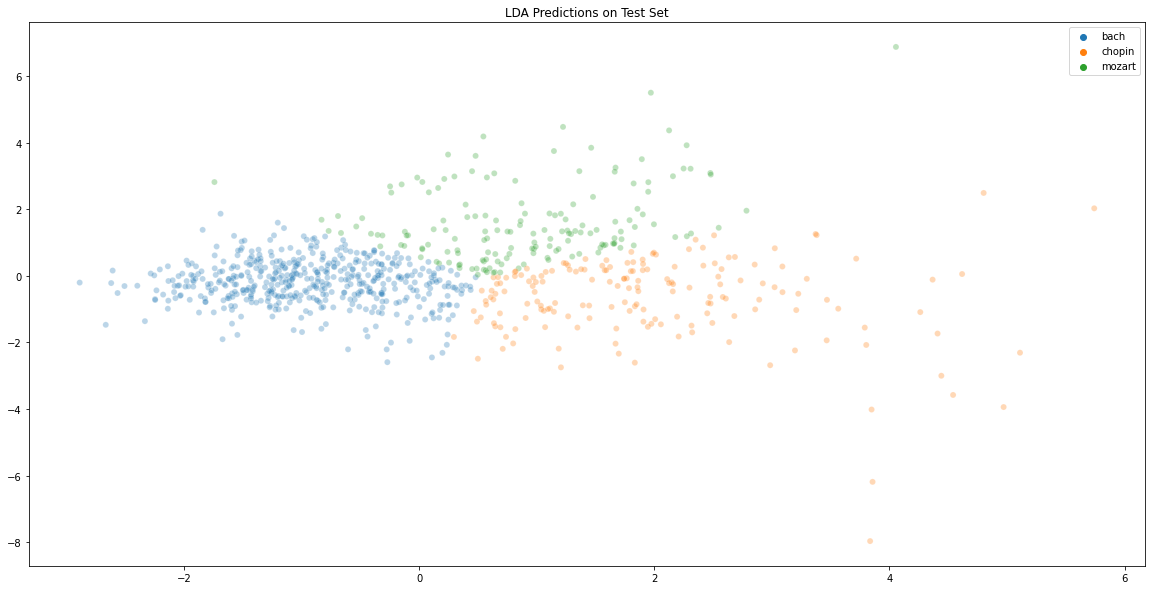

In [261]:
plt.figure(figsize=(20,10))

sns.scatterplot(x = test_lda[:,0], y = test_lda[:,1], alpha = 0.3, hue = labels)
plt.legend(loc='best')
plt.title('LDA Predictions on Test Set')

plt.show()

In [262]:
accuracy = sum(y_pred_lda == y_test)/len(y_test)
accuracy

0.7269417475728155

<AxesSubplot:>

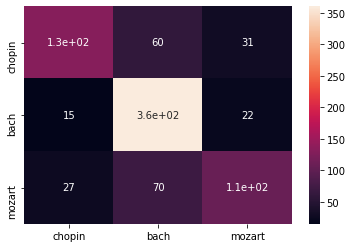

In [263]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_lda = confusion_matrix(y_test, y_pred_lda, labels = y_test.unique())
sns.heatmap(cf_lda, annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique())
#0-bach, 1-chopin, 2-mozart

References:
https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

## Decision Tree Classifier

In [264]:
from sklearn.tree import DecisionTreeClassifier

basic_dtc = DecisionTreeClassifier(max_depth = 30, min_samples_leaf = 5, min_samples_split = 20, ccp_alpha = 0.0015)
basic_dtc.fit(X_train, y_train)

ypred_basic_dtc = basic_dtc.predict(X_test)
print('Accuracy of uncross validated Decision Tree Classifier: ',(ypred_basic_dtc == y_test).mean())

Accuracy of uncross validated Decision Tree Classifier:  0.7451456310679612


In [225]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0,0.01,20),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state':[1]}

cv_dtc = DecisionTreeClassifier()
folds = KFold(n_splits = 5, random_state = 1, shuffle = True)
cv_gridsearch = GridSearchCV(cv_dtc, param_grid = grid_values, cv = folds, verbose = 1, n_jobs = -1)
_ = cv_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


DecisionTreeClassifier(ccp_alpha=0.0005263157894736842, max_depth=30,
                       min_samples_leaf=5, min_samples_split=20,
                       random_state=1)

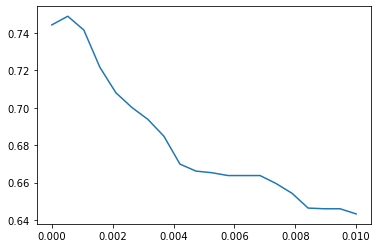

In [226]:
import seaborn as sns

#get cv results
scores = cv_gridsearch.cv_results_['mean_test_score']
vals = cv_gridsearch.cv_results_['param_ccp_alpha'].data

sns.lineplot(x = vals, y = scores)
cv_gridsearch.best_estimator_

In [227]:
ypred_cv_dtc = cv_gridsearch.best_estimator_.predict(X_test)

print('Accuracy of cross validated dtc: ',(ypred_cv_dtc == y_test).mean())

Accuracy of cross validated dtc:  0.7583489681050657


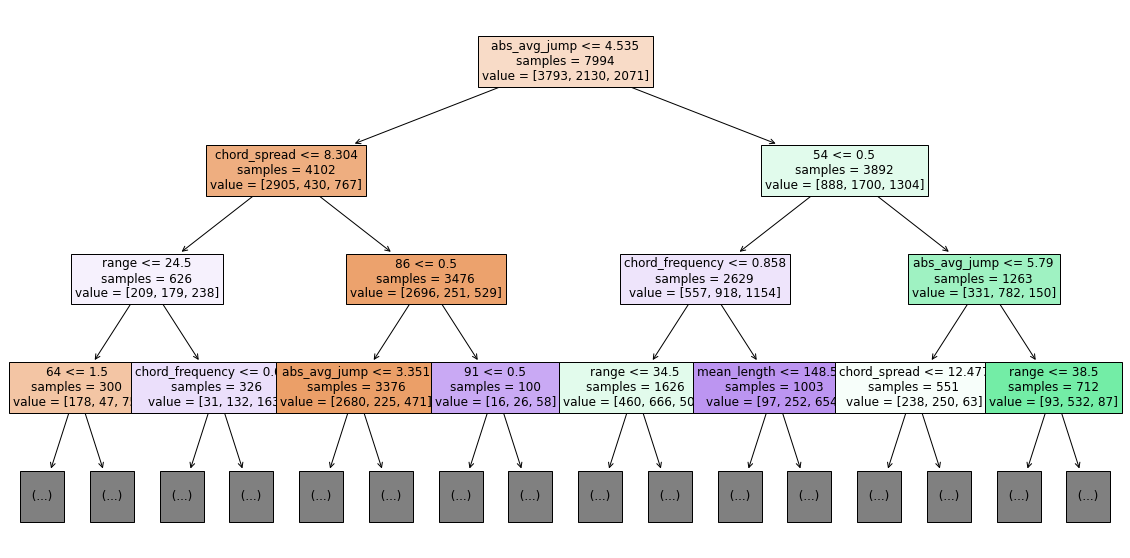

In [228]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
_ = plot_tree(cv_gridsearch.best_estimator_, feature_names = X_train.columns, max_depth = 3, fontsize=12, filled = True, impurity = False)

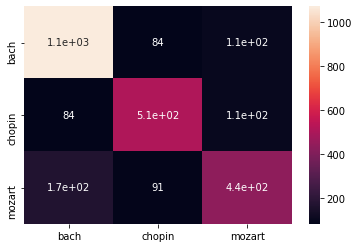

In [229]:
cf_cv_dtc = confusion_matrix(y_test, ypred_cv_dtc, labels=y_test.unique())
_=sns.heatmap(cf_cv_dtc, annot = True, xticklabels=y_test.unique(), yticklabels=y_test.unique())

## Random Forest Classifier

In [265]:
from sklearn.ensemble import RandomForestClassifier

basic_rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5, max_features = 9, random_state = 1)
basic_rf.fit(X_train, y_train)

ypred_basic_rf = basic_rf.predict(X_test)
print('Accuracy of basic RFC: ',(ypred_basic_rf == y_test).mean())

Accuracy of basic RFC:  0.8313106796116505


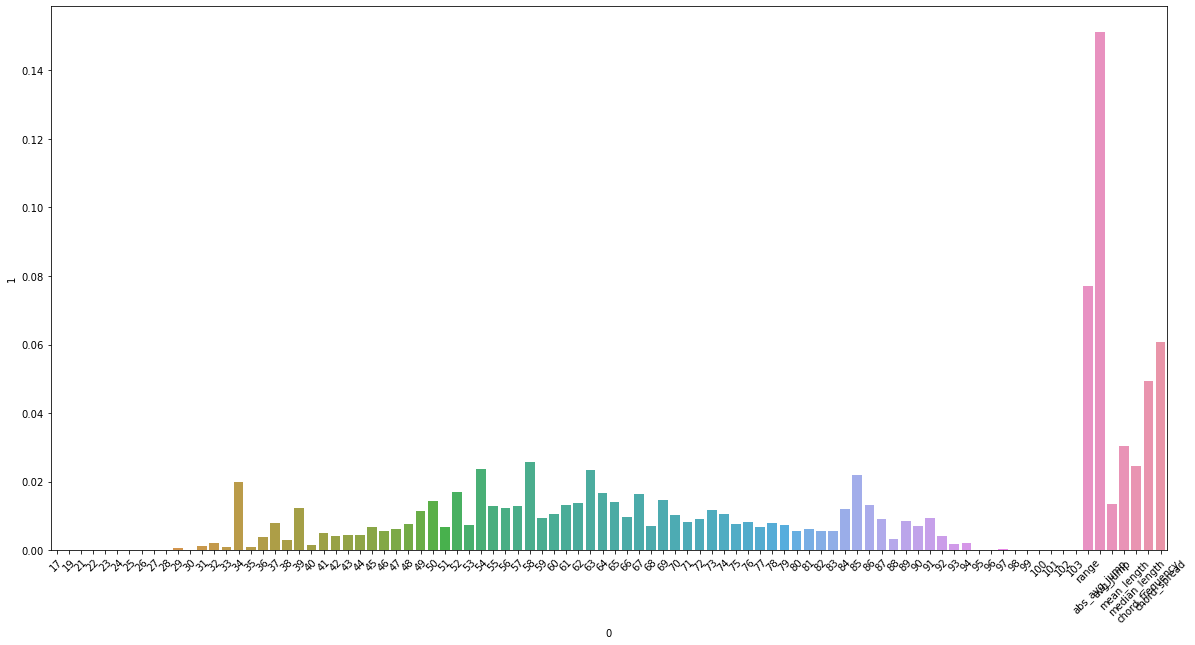

In [266]:
plt.figure(figsize=(20,10))

#feature importance
fi = pd.DataFrame([X_train.columns, basic_rf.feature_importances_]).T
sns.barplot(x = fi[0], y = fi[1])
_ = plt.xticks(rotation=45)

#plt.savefig('/content/drive/My Drive/IEOR142/FinalReportGraphicsModeling/3composer_nofeatures_noncvrf_feature_importances', bbox_inches = 'tight')

In [267]:
from sklearn.multiclass import OneVsRestClassifier

r = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5, max_features = 9, random_state = 1)
c = OneVsRestClassifier(r, n_jobs=-1)
c.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_features=9,
                                                     min_samples_leaf=5,
                                                     n_estimators=200,
                                                     random_state=1),
                    n_jobs=-1)

In [268]:
(c.predict(X_test) == y_test).mean()

0.8349514563106796

In [232]:
grid_values_rf = {'max_features':np.arange(5,25),
                  'n_estimators':[200],
                  'min_samples_leaf':[5],
                  'random_state':[1]}

cv_rf = RandomForestClassifier()
cv_gridsearch_rf = GridSearchCV(cv_rf, param_grid = grid_values_rf, cv = folds, verbose = 2, n_jobs = -1)
_ = cv_gridsearch_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(max_features=13, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

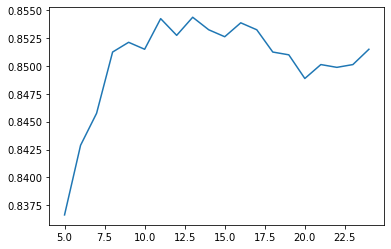

In [233]:
scores = cv_gridsearch_rf.cv_results_['mean_test_score']
vals = cv_gridsearch_rf.cv_results_['param_max_features'].data

sns.lineplot(x = vals, y = scores)
cv_gridsearch_rf.best_estimator_

In [234]:
ypred_cv_rf = cv_gridsearch_rf.best_estimator_.predict(X_test)
acc_cv_rf = (ypred_cv_rf == y_test).mean()
print('Accuracy of cv rf: ',acc_cv_rf)

Accuracy of cv rf:  0.8660412757973733


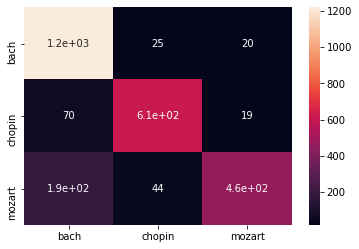

In [235]:
cf_rf = confusion_matrix(y_test, ypred_basic_rf, labels = y_test.unique())
_ = sns.heatmap(cf_rf, annot = True, xticklabels=y_test.unique(), yticklabels=y_test.unique())

## XGBoost

In [269]:
import xgboost as xgb

xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [270]:
xgbpred = xgbc.predict(X_test) 
print('Basic XGBoost Accuracy: ', (xgbpred == y_test).mean())

Basic XGBoost Accuracy:  0.8737864077669902


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

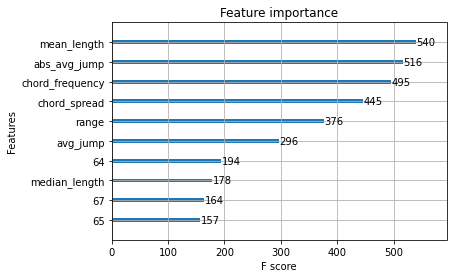

In [271]:
xgb.plot_importance(xgbc, max_num_features = 10)

<AxesSubplot:>

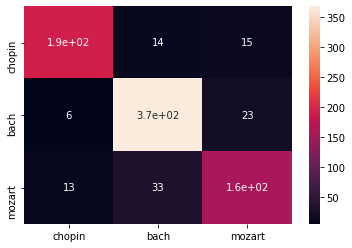

In [272]:
cf_xgb = confusion_matrix(y_test, xgbpred, labels = y_test.unique())
sns.heatmap(cf_xgb, annot = True, xticklabels=y_test.unique(), yticklabels=y_test.unique())

#plt.savefig('/content/drive/My Drive/IEOR142/FinalReportGraphicsModeling/3composer_allfeatures_notcv_xgboost_confusionmatrix', bbox_inches = 'tight')

In [104]:
#cross validated model
xg_grid = {'max_depth':np.arange(1,12),
           'subsample':[0.33,0.66,1],
           'random_state':[1]}

xg_cv = xgb.XGBClassifier()
gs_xg = GridSearchCV(xg_cv, 
                     param_grid = xg_grid, 
                     cv = folds, 
                     verbose = 1, n_jobs = -1)
gs_xg.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 165 out of 165 | elapsed:  2.0min finished


[14:12:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
        

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

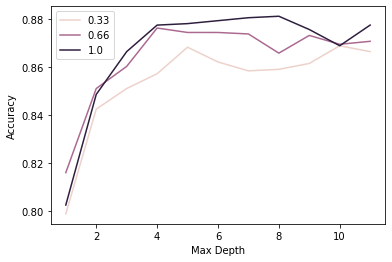

In [105]:
xg_test_scores = gs_xg.cv_results_['mean_test_score']
xg_param_depth = gs_xg.cv_results_['param_max_depth']
xg_param_subsample = gs_xg.cv_results_['param_subsample']

sns.lineplot(x = xg_param_depth, y = xg_test_scores, hue = xg_param_subsample)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
gs_xg.best_estimator_

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGBoost CV Accuracy on Test Set:  0.9215686274509803


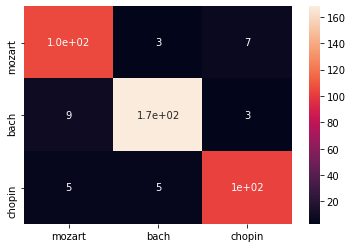

In [106]:
#accuracy on test set
ypred_cv_xg = gs_xg.best_estimator_.predict(X_test)

print('XGBoost CV Accuracy on Test Set: ', (ypred_cv_xg == y_test).mean())
cf_xgb_cv = confusion_matrix(y_test, ypred_cv_xg, labels = y_test.unique())
_ = sns.heatmap(cf_xgb_cv, annot = True, xticklabels=y_test.unique(), yticklabels=y_test.unique())

100%|██████████| 10000/10000 [00:04<00:00, 2354.00it/s]


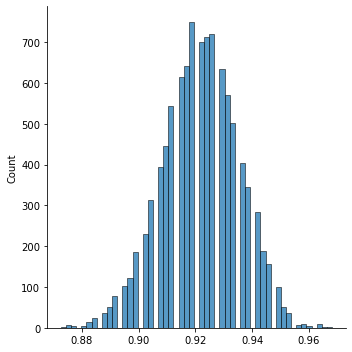

In [107]:
#bootstrap over accuracy to measure results
from tqdm import tqdm

def bootstrap(true, predictions, n = 10000):
  pred = pd.DataFrame({'true':true, 'pred':predictions})
  acc = []
  for i in tqdm(range(n), position = 0, leave = True):
    sub = pred.sample(frac = 1, replace = True)
    acc.append((sub['true']==sub['pred']).mean())
  return acc

b_accs = bootstrap(y_test, ypred_cv_xg)
sns.displot(b_accs)

In [108]:
#confidence interval
np.quantile(b_accs, [0.025,0.975])

array([0.89460784, 0.94607843])